In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!ls ./world-development-indicators

Country.csv
CountryNotes.csv
Footnotes.csv
Indicators.csv
Series.csv
SeriesNotes.csv
database.sqlite
hashes.txt


In [8]:
!head ./world-development-indicators/Indicators.csv

CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,133.56090740552298
Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,87.7976011532547
Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579191565161
Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,81.02332950839141
Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.0
Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,538000000.0
Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888095096395
Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59563.9892169935
Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.6439635478877049


# import data as dataframe object

In [2]:
df = pd.read_csv('./world-development-indicators/Indicators.csv',sep=',')

In [12]:
df.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


# IndicatorName exploration, what indicators are here?

In [3]:
# this function allows quick exploration of indicators present in the csv file based on the string of IndicatorName
## e.g groupto_firstletter(indicator_series, 'B') or groupto_firstletter(indicator_series, 'Trade')
def groupto_firstletter(series, letter):
    group = []
    lttr = str(letter).lower()
    index = 0
    for r in series:
        if series[index].lower().startswith(lttr):
            group.append(r)
            index += 1
        else:
            index += 1
    return pd.Series(group)

In [4]:
# this function allows easy search of letters or words in IndicatorName
def find_indicator(series, criterion):
    result = []
    str_cri = str(criterion).lower()
    index = 0
    for r in series:
        if str_cri in series[index].lower():
            result.append(r)
            index += 1
        else:
            index += 1
    return pd.Series(result)

In [5]:
indicator_series = pd.Series(df.IndicatorName.unique())

In [242]:
find_indicator(indicator_series, 'tertiary')[0]

'Gross enrolment ratio, tertiary, both sexes (%)'

In [186]:
find_indicator(indicator_series, 'unemployment')

0     Unemployment, youth female (% of female labor ...
1     Unemployment, youth male (% of male labor forc...
2     Unemployment, youth total (% of total labor fo...
3     Unemployment, total (% of total labor force) (...
4      Long-term unemployment (% of total unemployment)
5     Long-term unemployment, female (% of female un...
6     Long-term unemployment, male (% of male unempl...
7     Unemployment, female (% of female labor force)...
8     Unemployment, male (% of male labor force) (na...
9     Unemployment with primary education (% of tota...
10    Unemployment with primary education, female (%...
11    Unemployment with primary education, male (% o...
12    Unemployment with secondary education (% of to...
13    Unemployment with secondary education, female ...
14    Unemployment with secondary education, male (%...
15    Unemployment with tertiary education (% of tot...
16    Unemployment with tertiary education, female (...
17    Unemployment with tertiary education, male

# Further data exploration

In [235]:
country_filter = 'USA'
indicator_filter = 'Gross enrolment ratio, tertiary, both sexes'

mask1 = df['CountryCode'].str.contains(country_filter)
mask2 = df['IndicatorName'].str.contains(indicator_filter)

stage = df[mask1 & mask2]
print(f"shape = {stage.shape}, minimum year = {min(stage['Year'])}, maximum year = {max(stage['Year'])}, max value = {max(stage['Value'])}")

shape = (42, 6), minimum year = 1971, maximum year = 2013, max value = 95.3319625854492


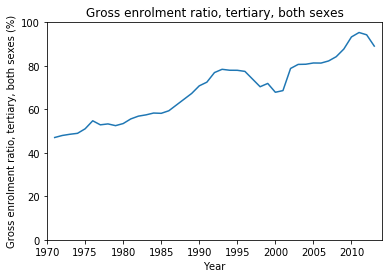

In [237]:
plt.plot(stage['Year'],stage['Value'])

plt.title(f'{indicator_filter}')
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.axis([1970,2014,0,100])

plt.show()

In [123]:
country_filter = 'USA'
indicator_filter = "Labor force with tertiary education \(\% of total\)"

mask1 = df['CountryCode'].str.contains(country_filter)
mask2 = df['IndicatorName'].str.contains(indicator_filter)

stage = df[mask1 & mask2]
stage.shape

(11, 6)

In [124]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2885275,United States,USA,Labor force with tertiary education (% of total),SL.TLF.TERT.ZS,1997,33.000000
3022624,United States,USA,Labor force with tertiary education (% of total),SL.TLF.TERT.ZS,1998,33.799999


In [128]:
print(f"{min(stage['Year'])} to {max(stage['Year'])}, values: {min(stage['Value'])} to {max(stage['Value'])}")

1997 to 2014, values: 30.899999618530305 to 35.7000007629395


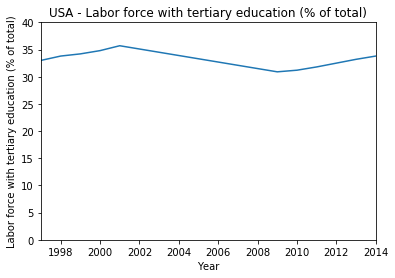

In [127]:
plt.plot(stage['Year'],stage['Value'])

plt.title(f'{country_filter} - {stage["IndicatorName"].iloc[0]}')
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.axis([1997,2014,0,40])

plt.show()

In [140]:
country_filter = 'USA'
indicator_filter = 'Unemployment with tertiary education \(\% of total unemployment\)'

mask1 = df['CountryCode'].str.contains(country_filter)
mask2 = df['IndicatorName'].str.contains(indicator_filter)

stage = df[mask1 & mask2]
print(f"shape = {stage.shape}, minimum year = {min(stage['Year'])}, maximum year = {max(stage['Year'])}, max value = {max(stage['Value'])}")

shape = (21, 6), minimum year = 1994, maximum year = 2014, max value = 47.2999992370605


In [141]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2479846,United States,USA,Unemployment with tertiary education (% of tot...,SL.UEM.TERT.ZS,1994,39.799999
2614213,United States,USA,Unemployment with tertiary education (% of tot...,SL.UEM.TERT.ZS,1995,41.299999


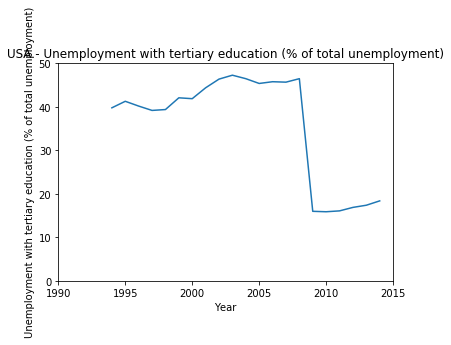

In [146]:
plt.plot(stage['Year'],stage['Value'])

plt.title(f'{country_filter} - {stage["IndicatorName"].iloc[0]}')
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.axis([1990,2015,0,50])

plt.show()

In [222]:
country_filter = 'USA'
indicator_filter = 'Unemployment, total (% of total labor force)'

mask1 = df['CountryCode'].str.contains(country_filter)
mask2 = df['IndicatorName'] == indicator_filter

stage = df[mask1 & mask2]
print(f"shape = {stage.shape}, minimum year = {min(stage['Year'])}, maximum year = {max(stage['Year'])}, max value = {max(stage['Value'])}")

shape = (24, 6), minimum year = 1991, maximum year = 2014, max value = 9.69999980926514


In [224]:
stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2109164,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1991,6.9
2230412,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1992,7.6
2354187,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1993,7.0
2479853,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1994,6.2
2614220,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1995,5.7


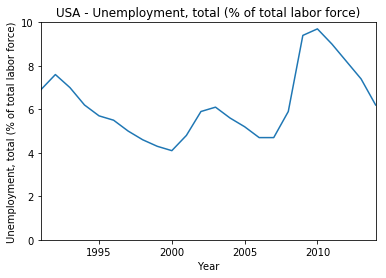

In [226]:
plt.plot(stage['Year'],stage['Value'])

plt.title(f'{country_filter} - {stage["IndicatorName"].iloc[0]}')
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.axis([1991,2014,0,10])

plt.show()

## Scatter plot

In [318]:
country_filter = "USA"
indicator_filter = "Unemployment, total (% of total labor force)"

mask1 = df['CountryCode'] == country_filter
mask2 = df['IndicatorName'] == indicator_filter
mask3 = df['Year'].between(1990,2014,inclusive=False)

unemployment_stage = df[mask1 & mask2 & mask3]
unemployment_stage.shape

(23, 6)

In [319]:
country_filter = "USA"
indicator_filter = "Gross enrolment ratio, tertiary, both sexes (%)"

mask1 = df['CountryCode'] == country_filter
mask2 = df['IndicatorName'] == indicator_filter
mask3 = df['Year'].between(1990,2014,inclusive=False)

enrolment_stage = df[mask1 & mask2 & mask3]
enrolment_stage.shape

(22, 6)

In [315]:
print(f"unemployment min year = {min(unemployment_stage['Year'])}")
print(f"unemployment max year = {max(unemployment_stage['Year'])}")
print(f"enrolment min year = {min(enrolment_stage['Year'])}")
print(f"enrolment max year = {max(enrolment_stage['Year'])}")

unemployment min year = 1991
unemployment max year = 2014
enrolment min year = 1971
enrolment max year = 2013


In [382]:
booleans = []
index = 0
for r in unemployment_stage['Year'].tolist():
    if r not in enrolment_stage['Year'].tolist():
        booleans.append(True)
        index += 1
    else:
        booleans.append(False)
        index += 1


unemployment_stage.loc[booleans].index.item()

2885477

In [393]:
unemployment_stage.drop(index=unemployment_stage.loc[booleans].index.item(), inplace=True)
len(unemployment_stage)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


22

In [406]:
unemployment_stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2109164,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1991,6.9
2230412,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1992,7.6
2354187,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1993,7.0
2479853,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1994,6.2
2614220,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1995,5.7
2749180,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1996,5.5
3022836,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1998,4.6
3164767,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,1999,4.3
3319449,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,2000,4.1
3470109,United States,USA,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,2001,4.8


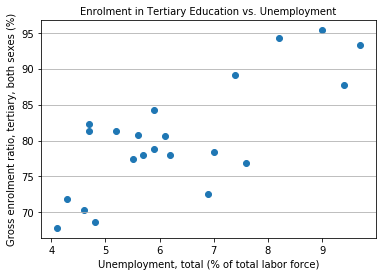

In [399]:
fig, axis = plt.subplots()

X = unemployment_stage['Value']
Y = enrolment_stage['Value']

axis.yaxis.grid(True)
axis.set_title('Enrolment in Tertiary Education vs. Unemployment',fontsize=10)
axis.set_xlabel(unemployment_stage['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(enrolment_stage['IndicatorName'].iloc[0],fontsize=10)

axis.scatter(X, Y)
plt.show()

In [402]:
np.corrcoef(unemployment_stage['Value'], enrolment_stage['Value'])

array([[1.        , 0.76060106],
       [0.76060106, 1.        ]])

With a correlation coefficient of 0.76 out of 1, I think there is a positive correlation between unemloyment and enrolment in tertiary education.